In [14]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [15]:
import tensorflow as tf
from tensorflow.keras import backend as K
from satellite_image_colorization.colorization.training import extractInput, makeModel
from satellite_image_colorization.colorization.settings import HEIGHT, WIDTH, DEFAULT_OPTIMIZER, LOSS

tf.random.set_seed(123)

In [3]:
print(HEIGHT, WIDTH, DEFAULT_OPTIMIZER, LOSS)

224 224 <keras.optimizer_v2.adam.Adam object at 0x000002170F2D5C10> mean_squared_error


In [4]:
input_shape_tuple = (WIDTH, HEIGHT, 1)
output_shape_tuple = (WIDTH, HEIGHT, 2)
dimensions_tuple = (WIDTH, HEIGHT)

dataset_path = 'D:\\pfc\\satellite_image_colorization\\data\\wv2\\training'
batch_size = 8

In [5]:
K.clear_session()
model = makeModel(input_shape_tuple, DEFAULT_OPTIMIZER, LOSS)

In [6]:
model.fit(
    extractInput(
        dataset_path,
        batch_size,
        dimensions_tuple,
        limit=None
    ),
    epochs=16,
    steps_per_epoch=4500
)

Epoch 1/16
4500/4500 [==============================] - 1537s 340ms/step - loss: 0.0052
Epoch 2/16
4500/4500 [==============================] - 1508s 335ms/step - loss: 0.0020
Epoch 3/16
4500/4500 [==============================] - 1508s 335ms/step - loss: 0.0015
Epoch 4/16
4500/4500 [==============================] - 1509s 335ms/step - loss: 0.0011
Epoch 5/16
4500/4500 [==============================] - 1509s 335ms/step - loss: 9.7053e-04
Epoch 6/16
4500/4500 [==============================] - 1509s 335ms/step - loss: 8.9013e-04
Epoch 7/16
4500/4500 [==============================] - 1509s 335ms/step - loss: 8.0787e-04
Epoch 8/16
4500/4500 [==============================] - 1510s 336ms/step - loss: 7.4733e-04
Epoch 9/16
4500/4500 [==============================] - 1509s 335ms/step - loss: 6.9824e-04
Epoch 10/16
4500/4500 [==============================] - 1509s 335ms/step - loss: 6.7175e-04
Epoch 11/16
4500/4500 [==============================] - 1511s 336ms/step - loss: 6.3899e-04
Ep

In [7]:
model.save('new_model_wv2_1.h5')

In [8]:
########################################
########################################
########################################

In [9]:
# img_files = os.listdir(ImagePath)
# batch_img_files = img_files[:10000]

In [10]:
# img_files = "D://PFC_code/data/training_2/MULTI_24Jul2015_ACOMP_TIFF.tif"
# # batch_img_files = img_files[:10000]

In [98]:
model = tf.keras.models.load_model('new_model_wv3_1.h5')

In [29]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

In [93]:
# img = plt.imread('D:/Material de estudo/Engenharia Cartográfica/PFC/Prof/bgr_rend.tif')
img = plt.imread('D:/pfc/satellite_image_colorization/data/wv3/training/915_0.jpg')

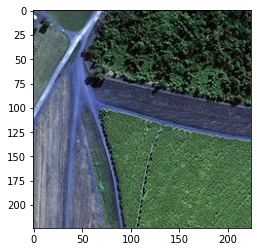

In [94]:
plt.imshow(img)

In [95]:
# img = img[:, :, :3]
# img = img[300:524, 300:524, :]

In [96]:
img.shape

(224, 224, 3)

In [97]:
# imageDir = img_files[0]
# img = cv2.imread(os.path.join(ImagePath, imageDir))
# img = cv2.imread(img_files)
# print(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
# img = img.astype(np.float32)
img_lab_rs = cv2.resize(img_lab, (WIDTH, HEIGHT)) # resize image to network input size
img_l = img_lab_rs[:,:,0] # pull out L channel
img_ab = img_lab_rs[:,:,1:] # Extracting the ab channel

img_l = img_l - 50
img_l = img_l/100
img_ab = img_ab/110
img_ab = img_ab - 1

img_l_reshaped = np.array([img_l.reshape((224,224, 1))])
img_ab_reshaped = img_ab.reshape((224,224,2))

In [82]:
# img_ab

In [83]:
# model.predict(img_l_reshaped)

#### model.predict(img_l_reshaped)

In [99]:
Prediction = model.predict(img_l_reshaped)
Prediction = Prediction + 1
Prediction = Prediction*110
Prediction = Prediction.reshape((224,224,2))

In [85]:
# Prediction[:, :, 0]

In [86]:
# Prediction[:, :, 1]

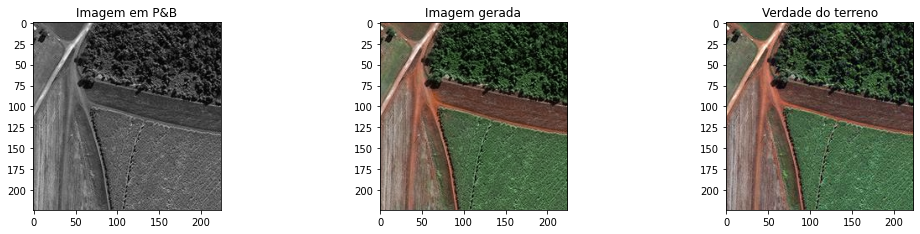

In [102]:
plt.figure(figsize=(30,20))
plt.subplot(5,5,1)
# img1 = plt.imread('D:/Material de estudo/Engenharia Cartográfica/PFC/Prof/bgr_rend.tif')
img1 = plt.imread('D:/pfc/satellite_image_colorization/data/wv3/training/915_0.jpg')
img1 = img1[:, :, :3]
# img1 = img1[1100:1324, 1741:1965, :]
# img1 = plt.imread(os.path.join(ImagePath, imageDir))

img = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
img = cv2.resize(img, (224, 224))
plt.title("Imagem em P&B")
plt.imshow(img)

plt.subplot(5,5,1+1)
img_ = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
img_[:,:,1] = Prediction[:, :, 0]
img_[:,:,2] = Prediction[:, :, 1]

# print(img_[:, :, 0])
# print(img_[:, :, 1])
# print(img_[:, :, 2])
img_ = cv2.cvtColor(img_, cv2.COLOR_Lab2BGR)
#img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
plt.title("Imagem gerada")
plt.imshow(img_)

plt.subplot(5,5,1+2)
plt.title("Verdade do terreno")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

In [103]:
img_ = Image.fromarray(img_)
img1 = Image.fromarray(img1)

In [104]:
img_.save('D:/Material de estudo/Engenharia Cartográfica/PFC/Fontes do relatório/Imagens/WV3-1-final-colorizada-2.tif')
img1.save('D:/Material de estudo/Engenharia Cartográfica/PFC/Fontes do relatório/Imagens/WV3-1-final-original-2.tif')

#### 